In [1]:
import tensorflow
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
a_0 = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [5]:
middle = 30

In [6]:
w_1 = tf.Variable(tf.truncated_normal([784, middle]))
b_1 = tf.Variable(tf.truncated_normal([1, middle]))
w_2 = tf.Variable(tf.truncated_normal([middle, 10]))
b_2 = tf.Variable(tf.truncated_normal([1, 10]))

## Define sigmoid function

In [7]:
def sigmoid(x):
    return tf.div(tf.constant(1.0), tf.add(tf.constant(1.0), tf.exp(tf.negative(x))))

## Forward propagation

In [8]:
z_1 = tf.add(tf.matmul(a_0, w_1), b_1)
a_1 = sigmoid(z_1)
z_2 = tf.add(tf.matmul(a_1, w_2), b_2)
a_2 = sigmoid(z_2)

## Difference

In [9]:
diff = tf.subtract(a_2, y)

## Define sigmoid prime function

In [10]:
def sigmoid_prime(x):
    return tf.multiply(sigmoid(x), tf.subtract(tf.constant(1.0), sigmoid(x)))

## Backward propagation

In [11]:
d_z_2 = tf.multiply(diff, sigmoid_prime(z_2))
d_b_2 = d_z_2
d_w_2 = tf.matmul(tf.transpose(a_1), d_z_2)

d_a_1 = tf.matmul(d_z_2, tf.transpose(w_2))
d_z_1 = tf.multiply(d_a_1, sigmoid_prime(z_1))
d_b_1 = d_z_1
d_w_1 = tf.matmul(tf.transpose(a_0), d_z_1)

In [12]:
eta = tf.constant(0.5)
step = [
    tf.assign(w_1,
            tf.subtract(w_1, tf.multiply(eta, d_w_1)))
  , tf.assign(b_1,
            tf.subtract(b_1, tf.multiply(eta,
                               tf.reduce_mean(d_b_1, axis=[0]))))
  , tf.assign(w_2,
            tf.subtract(w_2, tf.multiply(eta, d_w_2)))
  , tf.assign(b_2,
            tf.subtract(b_2, tf.multiply(eta,
                               tf.reduce_mean(d_b_2, axis=[0]))))
]

In [30]:
acct_mat = tf.equal(tf.argmax(a_2, 1), tf.argmax(y, 1))
acct_res = tf.reduce_sum(tf.cast(acct_mat, tf.float32))


sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(10)
    sess.run(step, feed_dict = {a_0: batch_xs, y: batch_ys})
    
    # Test accuracy
    if i % 1000 == 0:
        res = sess.run(acct_res, feed_dict= {a_0: mnist.test.images[:1000],
                        y : mnist.test.labels[:1000]})
        print(res, ' correct out of 1000 test images')

94.0  correct out of 1000 test images
843.0  correct out of 1000 test images
870.0  correct out of 1000 test images
881.0  correct out of 1000 test images
891.0  correct out of 1000 test images
899.0  correct out of 1000 test images
910.0  correct out of 1000 test images
908.0  correct out of 1000 test images
928.0  correct out of 1000 test images
923.0  correct out of 1000 test images


In [34]:
acct_mat = tf.equal(tf.argmax(a_2, 1), tf.argmax(y, 1))
acct_res = tf.reduce_sum(tf.cast(acct_mat, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

training_epoch = 20
batch_size = 10

for epoch in range(training_epoch):
    print('====== Epoch',  epoch,'=======\n')
    
    total_batch = int(mnist.train.num_examples / batch_size)
    #total_batch = 20000
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(step, feed_dict = {a_0: batch_xs, y: batch_ys})
    res = sess.run(acct_res, feed_dict= {a_0: mnist.test.images[:1000],
                    y: mnist.test.labels[:1000]})
    print(res, ' correct out of 1000 test images')
        

====== Epoch 0 =======

913.0  correct out of 1000 test images
====== Epoch 1 =======

919.0  correct out of 1000 test images
====== Epoch 2 =======

930.0  correct out of 1000 test images
====== Epoch 3 =======

933.0  correct out of 1000 test images
====== Epoch 4 =======

935.0  correct out of 1000 test images
====== Epoch 5 =======

947.0  correct out of 1000 test images
====== Epoch 6 =======

937.0  correct out of 1000 test images
====== Epoch 7 =======

946.0  correct out of 1000 test images
====== Epoch 8 =======

938.0  correct out of 1000 test images
====== Epoch 9 =======

945.0  correct out of 1000 test images
====== Epoch 10 =======

945.0  correct out of 1000 test images
====== Epoch 11 =======

945.0  correct out of 1000 test images
====== Epoch 12 =======

947.0  correct out of 1000 test images
====== Epoch 13 =======

948.0  correct out of 1000 test images
====== Epoch 14 =======

939.0  correct out of 1000 test images
====== Epoch 15 =======

947.0  correct out of 100

Label: [2]
Prediction: [2]


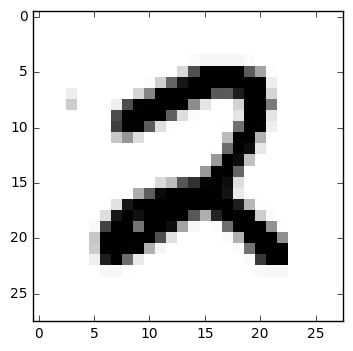

Label: [9]
Prediction: [9]


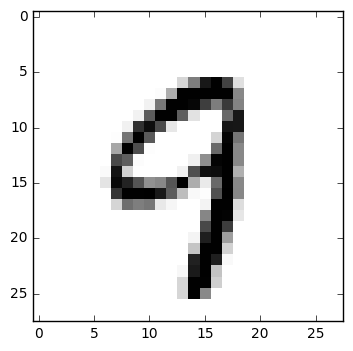

Label: [6]
Prediction: [6]


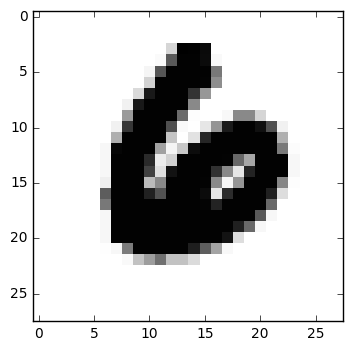

Label: [9]
Prediction: [9]


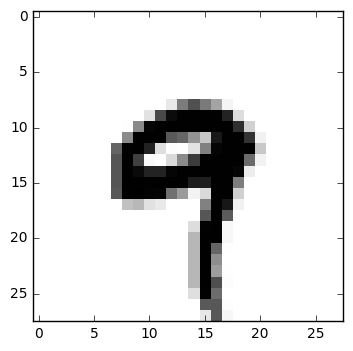

Label: [8]
Prediction: [8]


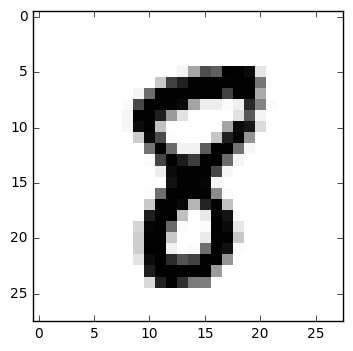

Label: [5]
Prediction: [5]


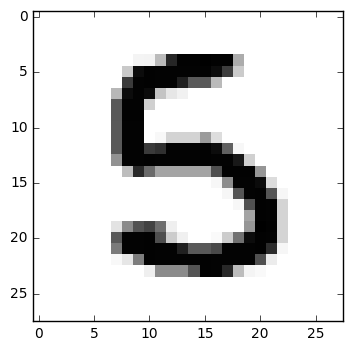

Label: [4]
Prediction: [4]


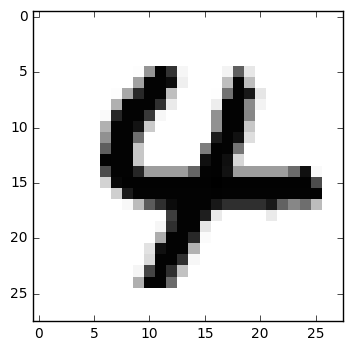

Label: [3]
Prediction: [3]


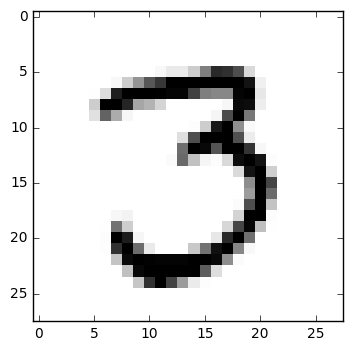

Label: [1]
Prediction: [1]


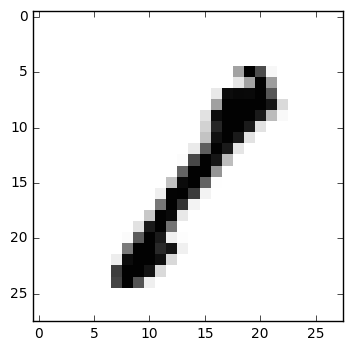

Label: [7]
Prediction: [7]


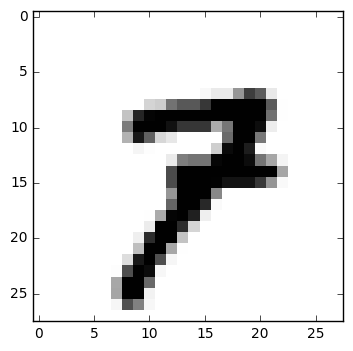

In [35]:
import matplotlib.pyplot as plt
import random

# Get one and predict
for i in range(10):
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(a_2, 1), 
                          feed_dict={a_0: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].
              reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [29]:
mnist.train.num_examples

55000